<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


Connect to the database.


In [112]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [16]:
import numpy as np
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [144]:
QUERY = """
SELECT  DevType, count(*) as count
FROM DevType
group by DevType
order by count desc
"""

pd.read_sql_query(QUERY,conn)

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


In [14]:
# your code goes here
QUERY = """
SELECT ConvertedComp 
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

df1=df[np.isfinite(df['ConvertedComp'])]
df1.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


Text(0.5, 0, 'ConvertedComp')

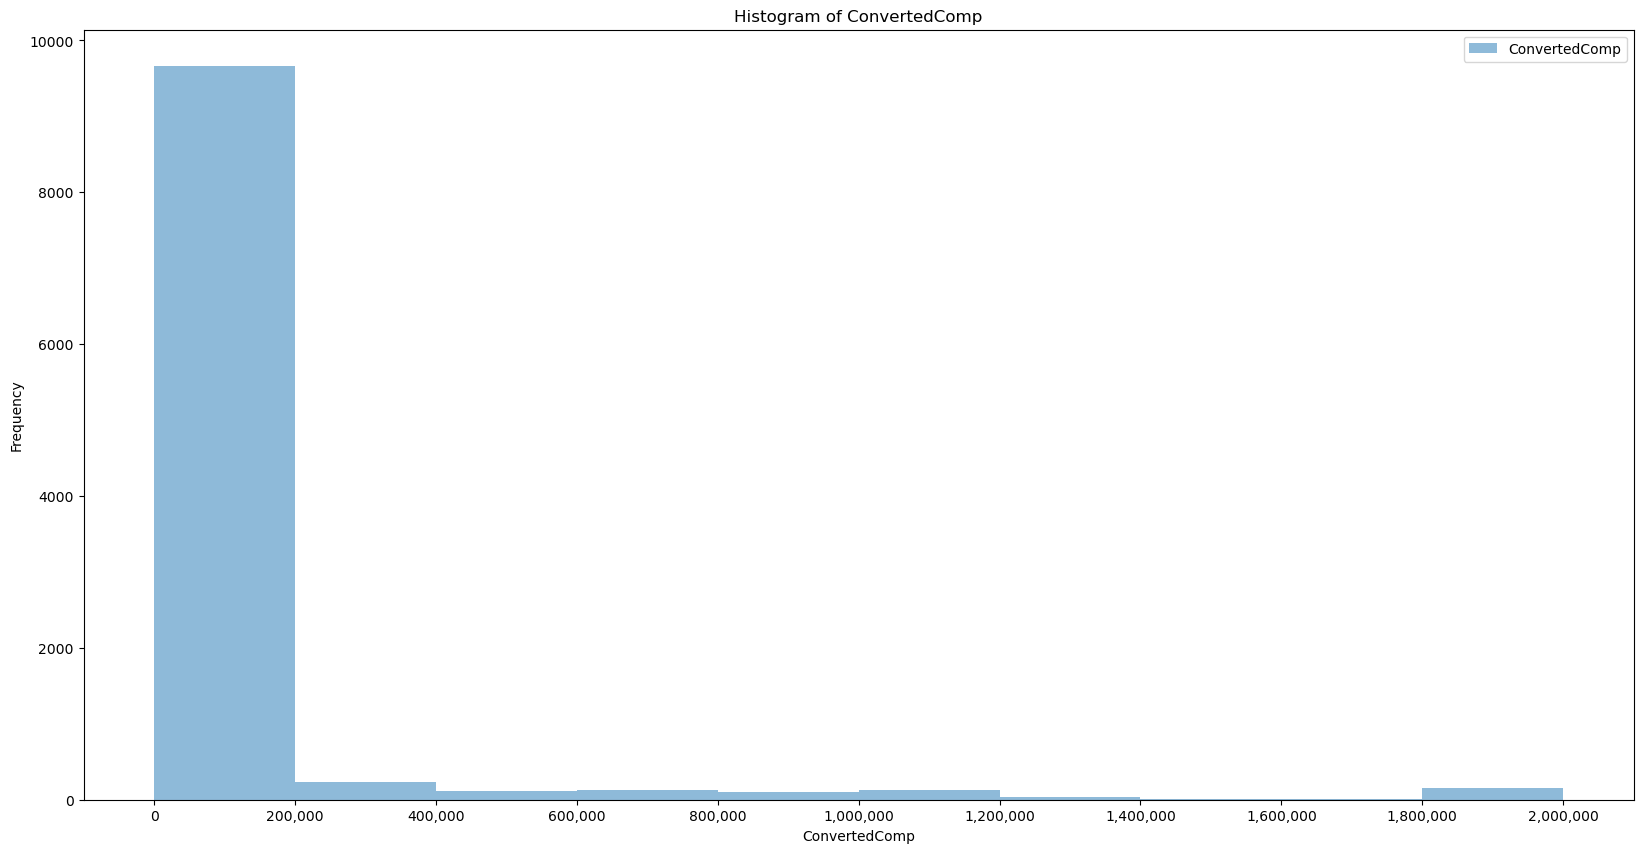

In [18]:
count, bin_edges = np.histogram(df1, 10)
df1.plot(kind='hist', figsize=(20, 10), bins=10, alpha = 0.5, xticks=bin_edges)
plt.title('Histogram of ConvertedComp')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xlabel('ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


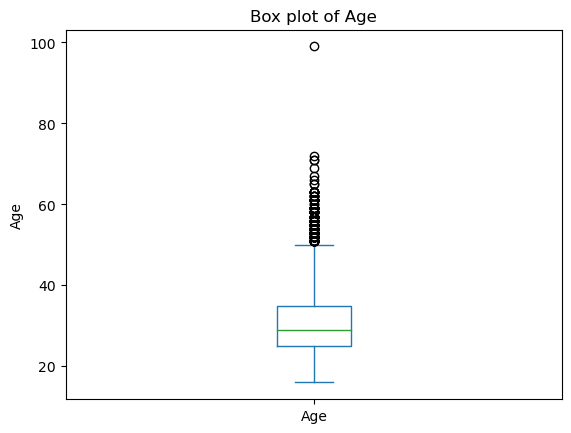

In [21]:
# your code goes here
# your code goes here
QUERY = """
SELECT Age 
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.plot(kind='box')

plt.title('Box plot of Age')
plt.ylabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0, 0.5, 'WorkWeekHrs')

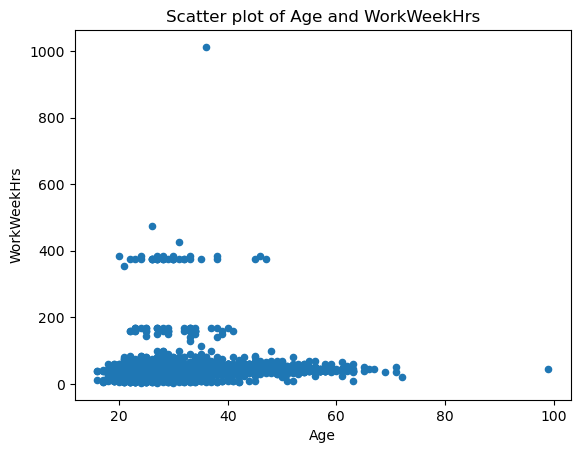

In [23]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.plot(kind='scatter', 
		x='Age', 
		y='WorkWeekHrs')
plt.title('Scatter plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0.5, 1.0, 'Bubble plot of WorkWeekHrs and CodeRevHrs; Age column as bubble size')

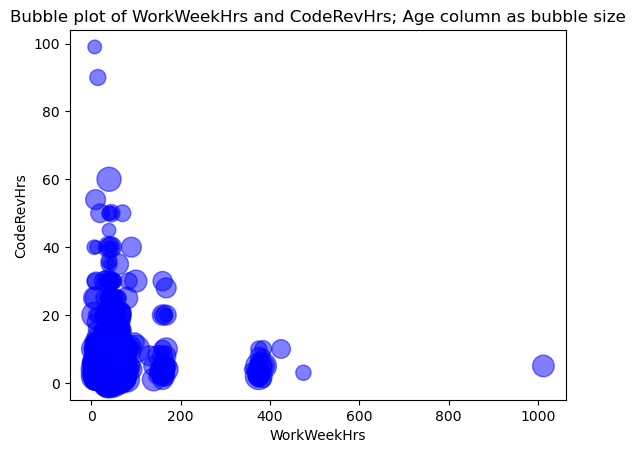

In [38]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
norm = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
ax = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=norm*1000
                    )
ax.set_xlabel('WorkWeekHrs')
ax.set_ylabel('CodeRevHrs')
ax.set_title('Bubble plot of WorkWeekHrs and CodeRevHrs; Age column as bubble size')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [116]:
QUERY = """
SELECT LanguageDesireNextYear, count(*) count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
"""

df = pd.read_sql_query(QUERY,conn)
df.sort_values('count', ascending=False)

,LanguageDesireNextYear,count
13,JavaScript,6630
11,HTML/CSS,5328
18,Python,5239
22,SQL,5012
25,TypeScript,4088
3,C#,3591
1,Bash/Shell/PowerShell,3097
12,Java,2953
10,Go,2759
14,Kotlin,1890


In [118]:

QUERY = """
SELECT LanguageWorkedWith, count(*) count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
"""

df = pd.read_sql_query(QUERY,conn)
df.sort_values('count', ascending=False)

,LanguageWorkedWith,count
13,JavaScript,8687
11,HTML/CSS,7830
22,SQL,7106
1,Bash/Shell/PowerShell,4642
18,Python,4542
12,Java,4506
3,C#,4288
25,TypeScript,3232
17,PHP,2913
4,C++,1946


In [139]:
QUERY = """
SELECT DatabaseWorkedWith, count(*)
FROM DatabaseWorkedWith
group by DatabaseWorkedWith
"""

pd.read_sql_query(QUERY,conn)

,DatabaseWorkedWith,count(*)
0,Cassandra,397
1,Couchbase,250
2,DynamoDB,831
3,Elasticsearch,1954
4,Firebase,1314
5,MariaDB,1709
6,Microsoft SQL Server,4110
7,MongoDB,3016
8,MySQL,5469
9,Oracle,1744


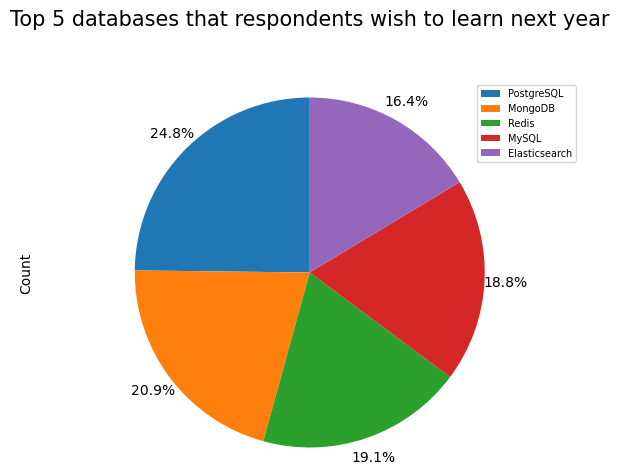

In [55]:
# your code goes here


QUERY = """
SELECT DatabaseDesireNextYear, count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
"""

df = pd.read_sql_query(QUERY,conn)

df['Percentage']=df['Count']/df['Count'].sum()
df.sort_values('Percentage', ascending=False, inplace=True, ignore_index=True)
df=df.head(5)

df['Count'].plot(kind='pie',
				figsize=(7, 5),
				labels=None, # turn off labels on pie chart
				autopct='%1.1f%%', # label wedges with values
				pctdistance=1.12, # the ratio between the center of each pie slice and the start of the text generated by autopct 
				startangle=90, # angle (counterclockwise from X)
				shadow=False, # add shadow
                 )
plt.title('Top 5 databases that respondents wish to learn next year', y=1.12, fontsize = 15) # scale the title up by 12% 
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df.DatabaseDesireNextYear, loc='best', fontsize=7) 
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Axes: xlabel='Age'>

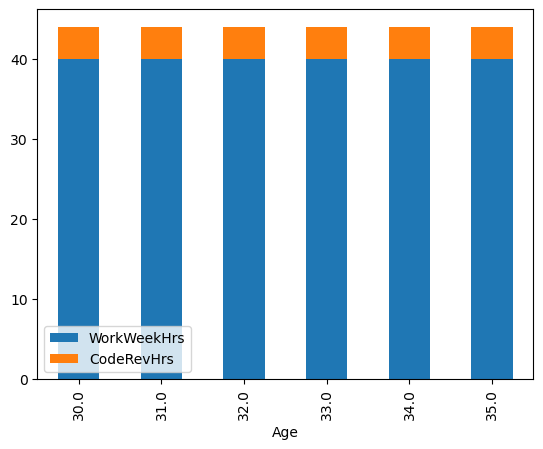

In [85]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age >=30 AND Age<=35
"""

df = pd.read_sql_query(QUERY,conn)
df1=df.groupby(['Age']).median()
df1.plot.bar(stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: xlabel='Age'>

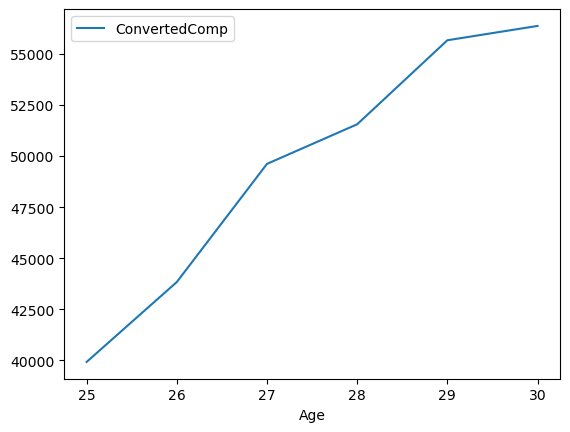

In [149]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age >=25 AND Age<=30
"""

df = pd.read_sql_query(QUERY,conn)
df1=df.groupby(['Age']).median()
df1.plot.line()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: ylabel='MainBranch'>

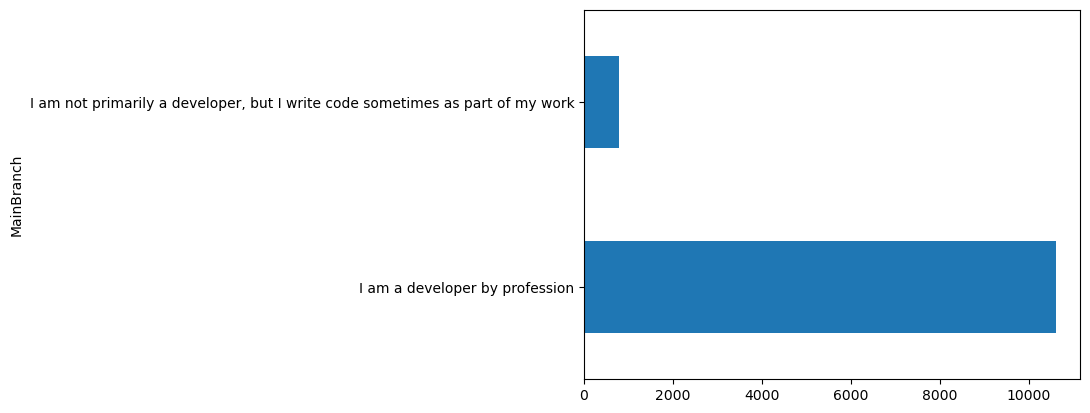

In [108]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df1=df.groupby(['MainBranch'])['MainBranch'].count()
df1.plot(kind='barh')

Close the database connection.


In [109]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
